# Úkol

Vašim cílem je vytvoření klasifikační neuronové sítě pro rozlišování různých druhů kosatců.

Budeme používat stejná stejná data jako v kapitole 5, můžete z ní vycházet.

Během zpracování tohoto úkolu bude postupně plnit tyto body

- Načtení dat a zobrazení základní statistiky
- Pro přípravu dat použijte binární encodování
- Vstupní hodnoty standardizujte pomocí StandardScaler
- Data si rozdělte na trénovací, testovací a validační

- Vytvořte model neurové sítě, nebojte se experimentovat s počtem skrytých vrstev a jejich velikostí
- Pravděpodobně budete potřebovat vrstvy Dense, můžete si vyzkoušet vrstvu Drop
- Jako aktivační funkce použijte relu, na výstupní vrstvu Softmax

- Při učení použijte nákladovou funkci categorical_crossentropy
- Optimalizační algoritmus bude ADAM
- Můžete sbírat další metriku accuracy

- Naučený model uložte do souboru

- Naučený model otestujte, zjištěte R2 a přesnost
- Vykreslete matici záměn

- Vykreslete historii učení

- Vyzkoušejte model na svých vstupních datech (vytvořte inferenci)

# Klasifikace datasetu IRIS pomocí ANN

Britský statistik a biolog Ronald Fisher publikoval v roce 1936 článek The use of multiple measurements in taxonomic problems jako příklad lineární diskriminační analýzy.

Dva ze tří druhů byly sbírány na poloostrově Gaspé "všechny ze stejné pastviny, sbírány ve stejný den a měřeny ve stejnou dobu stejnou osobou stejným přístrojem".

Soubor dat se skládá z 50 vzorků od každého ze tří druhů kosatce.

U každého vzorku byly změřeny čtyři znaky: délka a šířka kališních a okvětních lístků v centimetrech. 

Identifikace druhu kostace podle rozměrů různých okvětných lístků
- sepal - listy kalichu
- petal - okvětní lístek    

    https://en.wikipedia.org/wiki/Iris_flower_data_set
    https://www.kaggle.com/arshid/iris-flower-dataset

# 1. Načtení data a základní statistika
- náhled dat
- základní statistika
- NULL hodnoty

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
import joblib
data=pd.read_csv('..\\dataset\\IRIS.csv')

In [159]:
df = pd.read_csv('..\\dataset\\IRIS.csv')
print(">>> Náhled prvních 5 řádků:")
print(df.head(), "\n")
print(">>> Popisné statistiky:")
print(df.describe(), "\n")
print(">>> Null hodnoty v každém sloupci:")
print(df.isnull().sum(), "\n")

>>> Náhled prvních 5 řádků:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa 

>>> Popisné statistiky:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2

# 2. Vizualizace dat
- rozložení distribuce hodnot

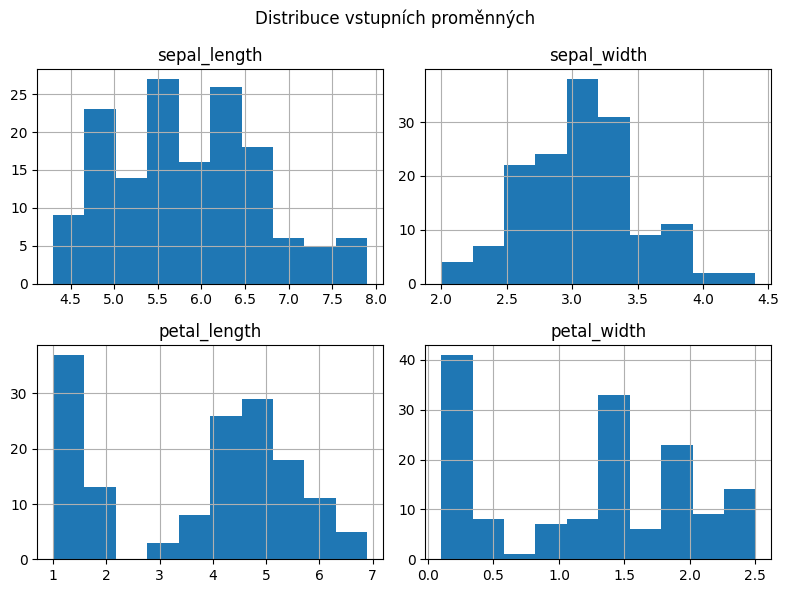

In [160]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
# 2a) Histogramy
df.hist(figsize=(8,6))
plt.suptitle('Distribuce vstupních proměnných')
plt.tight_layout()
plt.show()

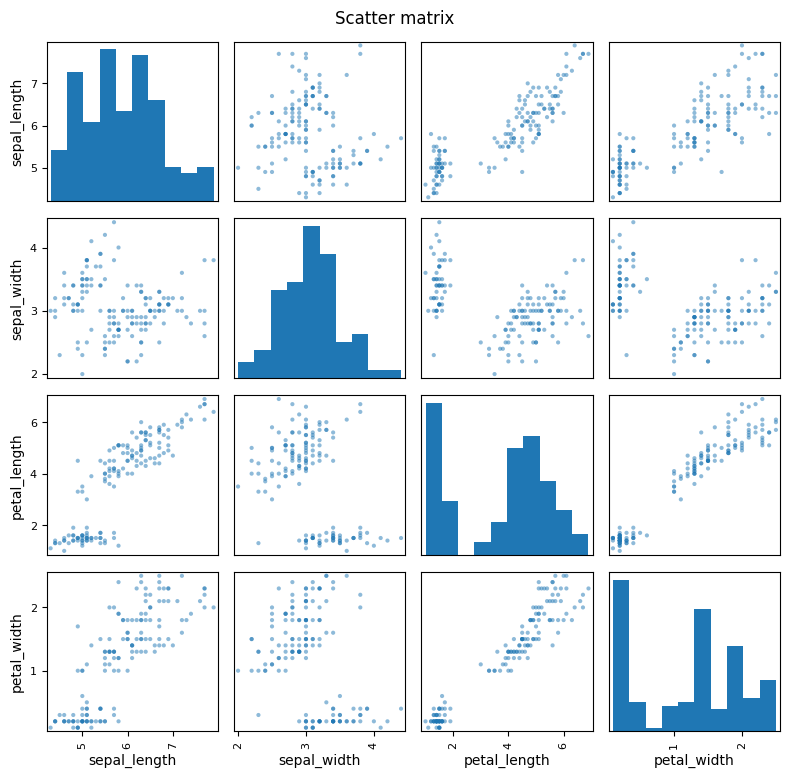

In [161]:
# 2b) Scatter-matrix
scatter_matrix(df.drop('species', axis=1), figsize=(8,8), diagonal='hist')
plt.suptitle('Scatter matrix')
plt.tight_layout()
plt.show()

# 3. Příprava dat
- binární encoding
- standardizace vstupních proměnných

In [162]:
le = LabelEncoder()
y = le.fit_transform(df['species'])

In [163]:
X = df.drop('species', axis=1).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [164]:
# 5. Rozdělení dat (60% train / 20% val / 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

## 4 Modelování neuronové sítě

Model neuronové sítě
* Sekvenční model - data procházejí ze vstupní vrstvy přes skryté vrstvy do výstupní vrstvy.
* Dense vrstva propojuje každý neuron z předchozí vrstvy s každým neuronem ve vrstvě.
* Drop vrstva náhodně nastavuje vstupní jednotky na 0 v každém kroku během doby trénování, což pomáhá zabránit nadměrnému přizpůsobení.
* Používají se aktivační funkce RELU a Softmax. 
* Poslední funkce Softmax je použita ve výstupní vrstvě, protože tento projekt je klasifikační.

* Kompilace je posledním krokem při vytváření modelu.
* Optimalizátor, který používáme, je Adam. Adam je optimalizační algoritmus, který lze použít místo klasického postupu stochastického gradientního sestupu k iterativní aktualizaci vah sítě na základě trénovacích dat.
* Nákladová funkce - categorical_crossentropy, speciální ztrátová funkce pro klasifikaci (https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class).
* Během učení se počítá další metrika - Accuracy

Model: "sequential"
 Layer (type)                Output Shape              Param #   

 dense (Dense)               (None, 16)                80        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 

Total params: 403

Trainable params: 403

Non-trainable params: 0

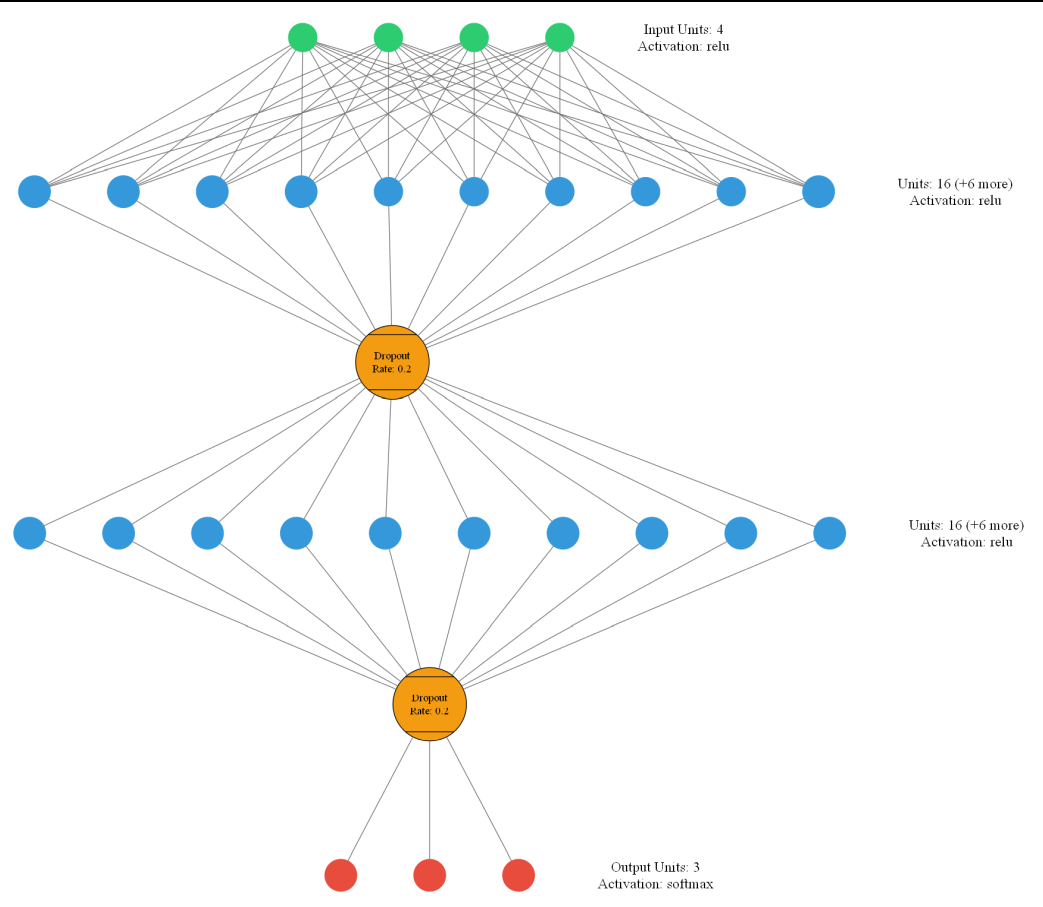

In [165]:
# 6–8. Vytvoření, kompilace a trénink MLPClassifier
model = MLPClassifier(
    hidden_layer_sizes=(16,16),
    activation='relu',
    solver='adam',
    alpha=0.001,
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=10,
    random_state=42
)
model.fit(X_train, y_train)

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(16, 16),
              max_iter=500, random_state=42, validation_fraction=0.2)

# 5. Uložení modelu

In [166]:
# 9. Uložení modelu
joblib.dump(model, 'iris_mlp_model.joblib')

['iris_mlp_model.joblib']

In [167]:

# 10. Vyhodnocení modelu (accuracy, R²)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Accuracy: 0.7
R^2 Score: 0.4


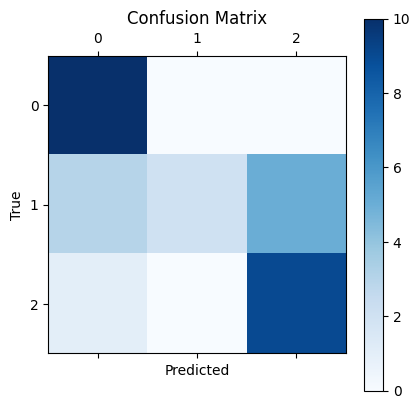

In [168]:
# 11. Matice záměn
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap='Blues')
plt.title('Confusion Matrix'); plt.xlabel('Predicted'); plt.ylabel('True')
plt.colorbar(); plt.show()

# 6. Zobrazení historie učení

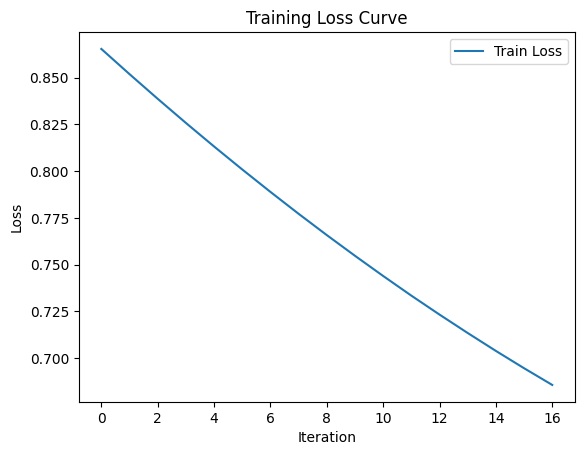

In [169]:
# 12. Historie učení (loss curve)
plt.plot(model.loss_curve_, label='Train Loss')
plt.title('Training Loss Curve'); plt.xlabel('Iteration'); plt.ylabel('Loss')
plt.legend(); plt.show()

# 7. Ověření modelu
- predikce testovacích hodnot
- R2 skóre
- Přesnost
- Confusion matrix trénovacích a testovacích dat

# 8. Použití modelu

In [170]:
sample = np.array([[1, 2, 1, 2]])
sample_scaled = scaler.transform(sample)
probs = model.predict_proba(sample_scaled)[0]
print(f"Iris setosa:     {probs[0]:.4f}")
print(f"Iris versicolor: {probs[1]:.4f}")
print(f"Iris virginica:  {probs[2]:.4f}")

Iris setosa:     0.9271
Iris versicolor: 0.0128
Iris virginica:  0.0601


In [171]:
# 13. Příklad inference
sample = np.array([[5.1, 3.5, 1.4, 0.2]])
probs = model.predict_proba(scaler.transform(sample))[0]
for cls, p in zip(le.classes_, probs):
    print(f"{cls}: {p:.4f}")

Iris-setosa: 0.7387
Iris-versicolor: 0.0759
Iris-virginica: 0.1855
